# Análise Exploratória de Dados

# Questão 1.

## Importando as bibliotecas


In [162]:
import pandas as pd
from glob import glob
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [168]:
import warnings
warnings.filterwarnings("ignore")

In [169]:
pd.options.mode.chained_assignment = None

In [170]:
dados_wave = sorted(glob('WaveBuoy/*.csv'))

In [171]:
dados_wave

['WaveBuoy\\AMETS Berth A Wave Buoy.csv',
 'WaveBuoy\\AMETS Berth B Wave Buoy.csv',
 'WaveBuoy\\Bantry Bay.csv',
 'WaveBuoy\\Brandon Bay.csv',
 'WaveBuoy\\Clew Bay.csv',
 'WaveBuoy\\SmartBay Wave Buoy.csv']

Como foram várias bases de dados a serem baixadas e analisadas utilizei o pacote do Python Glob , assim pude ler todos essas bases.

## Lendo arquivos para criar o dataframe

In [172]:
todos_dados_wave = pd.concat((pd.read_csv(cont)for cont in dados_wave), ignore_index=True)

Para poder analisar todos os dados juntos unicamente em apenas em uma dataframe, utilizei o recurso de concatenar e assim unir os conteúdos.

## Transformando as colunas para trabalhar melhor com os dados

In [173]:
todos_dados_wave.columns = ['longitude', 'latitude', 'data', 'boia', 'PeakPeriod', 'PeakDirection', 'UpcrossPeriod', 'TamanhoOnda', 'TamanhoMax', 'TemperaturaMar', 'MeanCurSpeed', 'MeanCurDirTo']

In [174]:
print(todos_dados_wave.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270337 entries, 0 to 270336
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   longitude       270337 non-null  object
 1   latitude        270337 non-null  object
 2   data            270337 non-null  object
 3   boia            270331 non-null  object
 4   PeakPeriod      81191 non-null   object
 5   PeakDirection   81191 non-null   object
 6   UpcrossPeriod   81191 non-null   object
 7   TamanhoOnda     81191 non-null   object
 8   TamanhoMax      37800 non-null   object
 9   TemperaturaMar  270337 non-null  object
 10  MeanCurSpeed    52055 non-null   object
 11  MeanCurDirTo    52052 non-null   object
dtypes: object(12)
memory usage: 24.8+ MB
None


In [175]:
todos_dados_wave['data'] = pd.to_datetime(todos_dados_wave['data'], errors='coerce')

In [176]:
todos_dados_wave['latitude'] = pd.to_numeric(todos_dados_wave['latitude'], errors='coerce')
todos_dados_wave['longitude'] = pd.to_numeric(todos_dados_wave['longitude'], errors='coerce')
todos_dados_wave['TamanhoOnda'] = pd.to_numeric(todos_dados_wave['TamanhoOnda'], errors='coerce')
todos_dados_wave['TamanhoMax'] = pd.to_numeric(todos_dados_wave['TamanhoMax'], errors='coerce')
todos_dados_wave['TemperaturaMar'] = pd.to_numeric(todos_dados_wave['TemperaturaMar'], errors='coerce')

In [177]:
todos_dados_wave['data'].dt.tz_localize(None)

0                        NaT
1        2021-08-11 02:22:00
2        2021-08-11 02:52:00
3        2021-08-11 03:22:00
4        2021-08-11 03:52:00
                 ...        
270332   2022-08-12 01:20:00
270333   2022-08-12 01:25:00
270334   2022-08-12 01:30:00
270335   2022-08-12 01:35:00
270336   2022-08-12 01:40:00
Name: data, Length: 270337, dtype: datetime64[ns]

In [178]:
todos_dados_wave['mês'] = todos_dados_wave['data'].dt.month

In [179]:
todos_dados_wave['ano'] = todos_dados_wave['data'].dt.year

In [180]:
todos_dados_wave = todos_dados_wave[['ano', 'mês', 'longitude', 'latitude', 'boia', 'TamanhoOnda', 'TemperaturaMar']]

In [181]:
todos_dados_wave

,ano,mês,longitude,latitude,boia,TamanhoOnda,TemperaturaMar
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021.0,8.0,-10.297370,54.275300,AMETS Berth A Wave Buoy,142.0,15.25
2,2021.0,8.0,-10.297370,54.275300,AMETS Berth A Wave Buoy,141.0,15.25
3,2021.0,8.0,-10.297370,54.275300,AMETS Berth A Wave Buoy,136.0,15.30
4,2021.0,8.0,-10.297370,54.275300,AMETS Berth A Wave Buoy,128.0,15.30
...,...,...,...,...,...,...,...
270332,2022.0,8.0,-9.262278,53.228333,SmartBay Wave Buoy,NaN,18.21
270333,2022.0,8.0,-9.262278,53.228333,SmartBay Wave Buoy,NaN,18.21
270334,2022.0,8.0,-9.262278,53.228333,SmartBay Wave Buoy,NaN,18.25
270335,2022.0,8.0,-9.262278,53.228333,SmartBay Wave Buoy,NaN,18.25


Para meu melhor entendimento mudei os nomes das colunas que trabalhei, também mudei os tipos de dados, a data de object para datetime e os outros dados que utilizei para numéricos.

Voltando a data, retirei o fuso, horas e dias já que não iam ser aproveitados para entregar os dados pedidos. Restando apenas os meses e anos, que também separei em colunas para otimizar visualização. 

Por último reduzi as colunas para só utilizar as que eu trabalharia.

## Temperatura mais baixa em cada boia

In [15]:
colunas_selecionadas1 = ['boia','latitude', 'longitude', 'TemperaturaMar']

In [16]:
microdados1 = todos_dados_wave.filter(items=colunas_selecionadas1)

In [17]:
microdados1.groupby(['boia','latitude', 'longitude']).min()

,,,TemperaturaMar
boia,latitude,longitude,
AMETS Berth A Wave Buoy,54.275300,-10.297370,8.55
AMETS Berth B Wave Buoy,54.225100,-10.150990,8.15
Bantry Bay,51.647000,-9.681000,5.27
Brandon Bay,52.282333,-10.094833,4.47
Clew Bay,53.801353,-9.911498,7.50
SmartBay Wave Buoy,53.228333,-9.262278,5.31


In [18]:
microdados1 = microdados1.groupby(['boia','latitude', 'longitude']).min()

In [216]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)


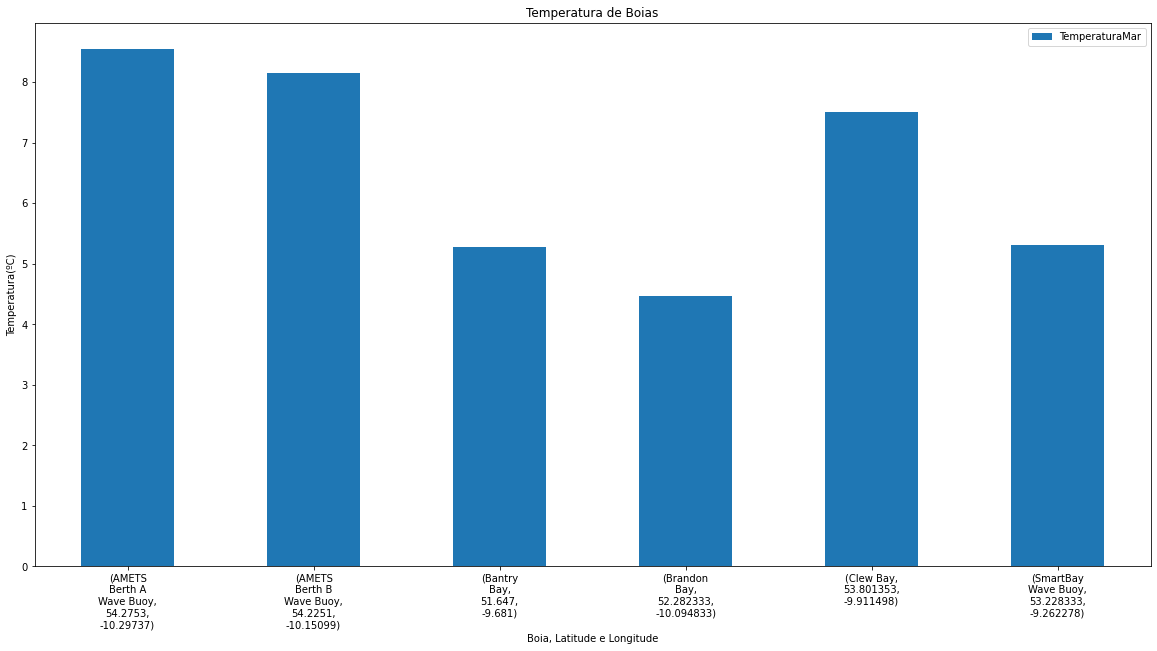

In [217]:
wrap_labels(ax, 10)
ax.figure

Para poder responder a primeira questão reduzi ainda mais o dataframe. Operei com o groupby agreguei dados e assim consegui extrair a menor temperatura em cada uma das boias, incluindo suas localizações: latitude e longitude.

Plotei para visualizar com mais qualidade os dados apresentados.

Com os dados apresentados vimos que a menor temperatura de todas as boias, com 4.47°C, foi em Brandon Bay com as coordenadas 52.282333, -10.094833.

## Em que mês geralmente ocorre?


In [20]:
colunas_selecionadas1a = ['ano', 'mês', 'TemperaturaMar']

In [21]:
microdados1a = todos_dados_wave.filter(items=colunas_selecionadas1a)

In [22]:
microdados1a.groupby(['ano', 'mês']).min()

TemperaturaMar
ano    mês                 
2021.0 8.0            13.20
       9.0            14.15
       10.0           10.99
       11.0            8.45
       12.0            6.87
2022.0 1.0             5.31
       2.0             6.66
       3.0             4.47
       4.0             7.99
       5.0            10.50
       6.0            11.48
       7.0            13.20
       8.0            14.45

In [23]:
microdados1a = microdados1a.groupby(['ano', 'mês']).min()

In [ ]:
microdados1a.plot(kind='bar', figsize=(20,10))
plt.title('Temperatura do Mar')
plt.xlabel('Boia, Latitude e Longitude')
plt.ylabel('Temperatura(ºC)')
plt.show()

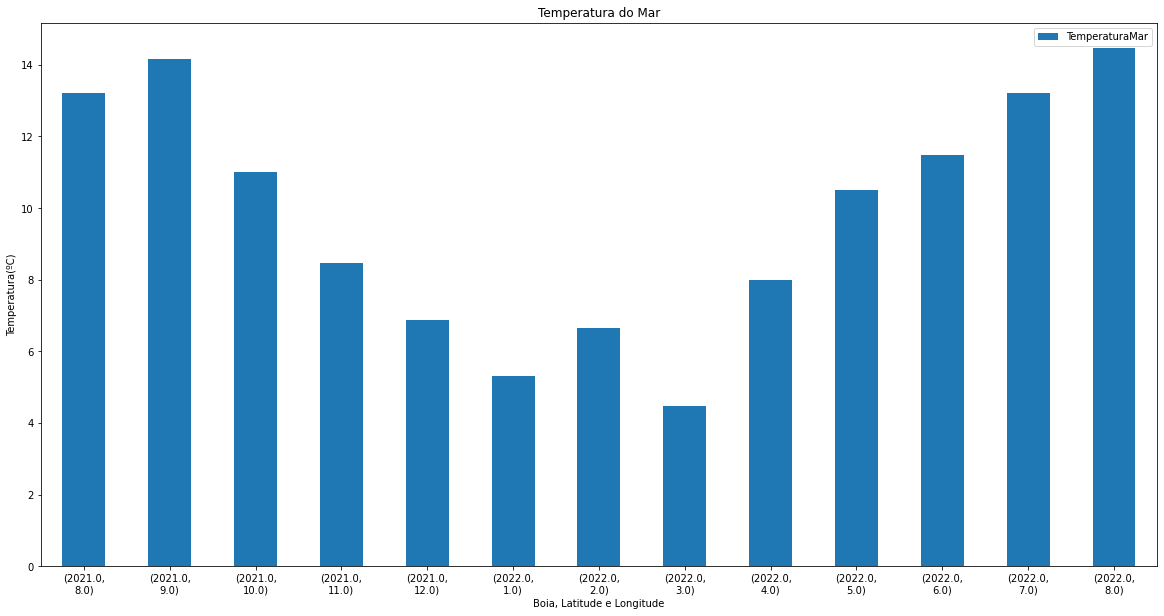

In [220]:
wrap_labels(ax, 10)
ax.figure

Fiz o mesmo de antes com algumas modificações e utilizei outras colunas.

Percebe-se que a menor temperatura em um ano de dados ocorreu no mês de 03 de 2022.

# Questão 2.
## Lendo varios arquivos - TIDE


In [25]:
dados_tide = sorted(glob('TideData/*.csv'))

In [26]:
dados_tide

['TideData\\Aranmore Island - Leabgarrow.csv',
 'TideData\\Ballycotton Harbour.csv',
 'TideData\\Ballyglass Harbour.csv',
 'TideData\\Castletownbere Port.csv',
 'TideData\\Dingle Harbour.csv',
 'TideData\\Dublin Port.csv',
 'TideData\\Galway Port.csv',
 'TideData\\Howth Water Level 1.csv',
 'TideData\\Killybegs Port.csv',
 'TideData\\Kinvara - Unreferenced.csv',
 'TideData\\Roonagh Pier.csv',
 'TideData\\Skerries Harbour.csv',
 'TideData\\Sligo.csv',
 'TideData\\Union Hall Harbor.csv',
 'TideData\\Wexford Harbour.csv']

Novamente utilizei o glob para ler todos os arquivos precisos para exração dos dados.

## Lendo arquivos para criar o dataframe


In [27]:
todos_dados_tide = pd.concat((pd.read_csv(cont)for cont in dados_tide), ignore_index=True)

Utilizando a função do concatenar para unir os dados

## Transformando as colunas para trabalhar melhor com os dados 


In [28]:
todos_dados_tide.columns = ['data', 'lugar', 'latitude', 'longitude', 'NivelAguaLAT', 'NivelAguaOD', 'flag']

In [29]:
print(todos_dados_tide.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333419 entries, 0 to 1333418
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   data          1333419 non-null  object 
 1   lugar         1333404 non-null  object 
 2   latitude      1333419 non-null  object 
 3   longitude     1333419 non-null  object 
 4   NivelAguaLAT  1181140 non-null  object 
 5   NivelAguaOD   1333419 non-null  object 
 6   flag          1333404 non-null  float64
dtypes: float64(1), object(6)
memory usage: 71.2+ MB
None


In [30]:
todos_dados_tide['data'] = pd.to_datetime(todos_dados_tide['data'], errors='coerce')

In [31]:
todos_dados_tide['latitude'] = pd.to_numeric(todos_dados_tide['latitude'], errors='coerce')
todos_dados_tide['longitude'] = pd.to_numeric(todos_dados_tide['longitude'], errors='coerce')
todos_dados_tide['NivelAguaLAT'] = pd.to_numeric(todos_dados_tide['NivelAguaLAT'], errors='coerce')
todos_dados_tide['NivelAguaOD'] = pd.to_numeric(todos_dados_tide['NivelAguaOD'], errors='coerce')

In [32]:
valor = todos_dados_tide['NivelAguaLAT'].min()
todos_dados_tide['NivelAguaLAT'] = todos_dados_tide['NivelAguaLAT'].fillna(valor)

In [33]:
todos_dados_tide = todos_dados_tide.dropna(how= 'any', axis=0)

In [34]:
todos_dados_tide['data'].dt.tz_localize(None)

1         2021-08-11 18:30:00
2         2021-08-11 18:35:00
3         2021-08-11 18:40:00
4         2021-08-11 18:45:00
5         2021-08-11 18:50:00
                  ...        
1333414   2022-08-12 01:20:00
1333415   2022-08-12 01:25:00
1333416   2022-08-12 01:30:00
1333417   2022-08-12 01:35:00
1333418   2022-08-12 01:40:00
Name: data, Length: 1333404, dtype: datetime64[ns]

In [35]:
todos_dados_tide['mês'] = todos_dados_tide['data'].dt.month

In [36]:
todos_dados_tide['ano'] = todos_dados_tide['data'].dt.year

In [37]:
todos_dados_tide = todos_dados_tide[['ano', 'mês', 'lugar', 'latitude', 'longitude', 'NivelAguaLAT', 'NivelAguaOD', 'flag']]

In [38]:
todos_dados_tide

,ano,mês,lugar,latitude,longitude,NivelAguaLAT,NivelAguaOD,flag
1,2021,8,Aranmore Island - Leabgarrow,54.9905,-8.4955,3.734,1.531,1.0
2,2021,8,Aranmore Island - Leabgarrow,54.9905,-8.4955,3.772,1.569,1.0
3,2021,8,Aranmore Island - Leabgarrow,54.9905,-8.4955,3.810,1.607,1.0
4,2021,8,Aranmore Island - Leabgarrow,54.9905,-8.4955,3.845,1.642,1.0
5,2021,8,Aranmore Island - Leabgarrow,54.9905,-8.4955,3.854,1.651,1.0
...,...,...,...,...,...,...,...,...
1333414,2022,8,Wexford Harbour,52.3385,-6.4589,0.241,-0.715,0.0
1333415,2022,8,Wexford Harbour,52.3385,-6.4589,0.208,-0.748,0.0
1333416,2022,8,Wexford Harbour,52.3385,-6.4589,0.206,-0.750,0.0
1333417,2022,8,Wexford Harbour,52.3385,-6.4589,0.203,-0.753,0.0


Dessa vez, além de transformar o tipo dos dados, tive com lidar com dados nulos, assim aplicando tratamento. 

Mas outra vez ajustei a data para ser mais fácil de manuseá-la.

## Onde (lat/long) temos o maior nível de água?


In [39]:
colunas_selecionadas2 = [ 'lugar','latitude', 'longitude','NivelAguaLAT', 'NivelAguaOD']

In [40]:
microdados2= todos_dados_tide.filter(items=colunas_selecionadas2)

In [41]:
microdados2.groupby(['lugar','latitude', 'longitude']).max()

,,,NivelAguaLAT,NivelAguaOD
lugar,latitude,longitude,,
Aranmore Island - Leabgarrow,54.990500,-8.49550,4.717,2.514
Ballycotton Harbour,51.827800,-8.00070,4.704,2.215
Ballyglass Harbour,54.253600,-9.89280,4.266,2.162
Castletownbere Port,51.649600,-9.90340,4.272,2.182
Dingle Harbour,52.139240,-10.27732,5.081,2.526
Dublin Port,53.345700,-6.22170,4.783,2.278
Galway Port,53.269000,-9.04800,6.143,3.176
Howth Water Level 1,53.391335,-6.06809,-30.616,2.313
Killybegs Port,54.636400,-8.39490,4.656,2.363


In [42]:
microdados2 = microdados2.groupby(['lugar','latitude', 'longitude']).max()

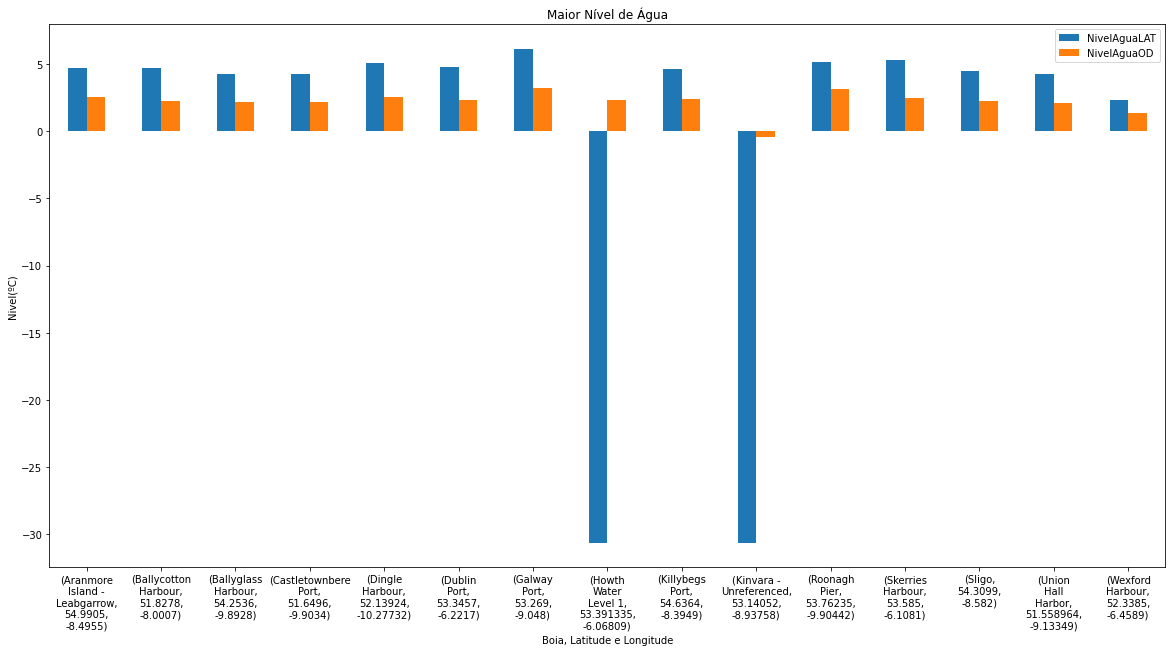

In [222]:
wrap_labels(ax, 10)
ax.figure

Apos separar e agrupar as colunas que iam ser utilizadas para descobrir onde seria o maior nível de água registrado. 

Constatei que os maiores níveis de água das duas medidas LAT e ODMalin fica em Galway Port com as coordenadas 53.269000, -9.04800 registrando em metros 6.143 LAT e 3.176 ODMalin.

## Em que mês geralmente ocorre?


In [44]:
colunas_selecionadas2a = ['ano', 'mês', 'NivelAguaLAT', 'NivelAguaOD']

In [45]:
microdados2a = todos_dados_tide.filter(items=colunas_selecionadas2a)

In [46]:
microdados2a.groupby(['ano','mês']).max()

NivelAguaLAT  NivelAguaOD
ano  mês                           
2021 8           5.261        2.499
     9           5.509        2.697
     10          5.625        2.904
     11          5.757        2.940
     12          6.143        3.176
2022 1           5.886        3.032
     2           5.720        2.963
     3           5.389        2.690
     4           5.420        2.678
     5           5.653        2.900
     6           5.391        2.695
     7           5.316        2.592
     8           5.165        2.399

In [47]:
microdados2a = microdados2a.groupby(['ano','mês']).max()

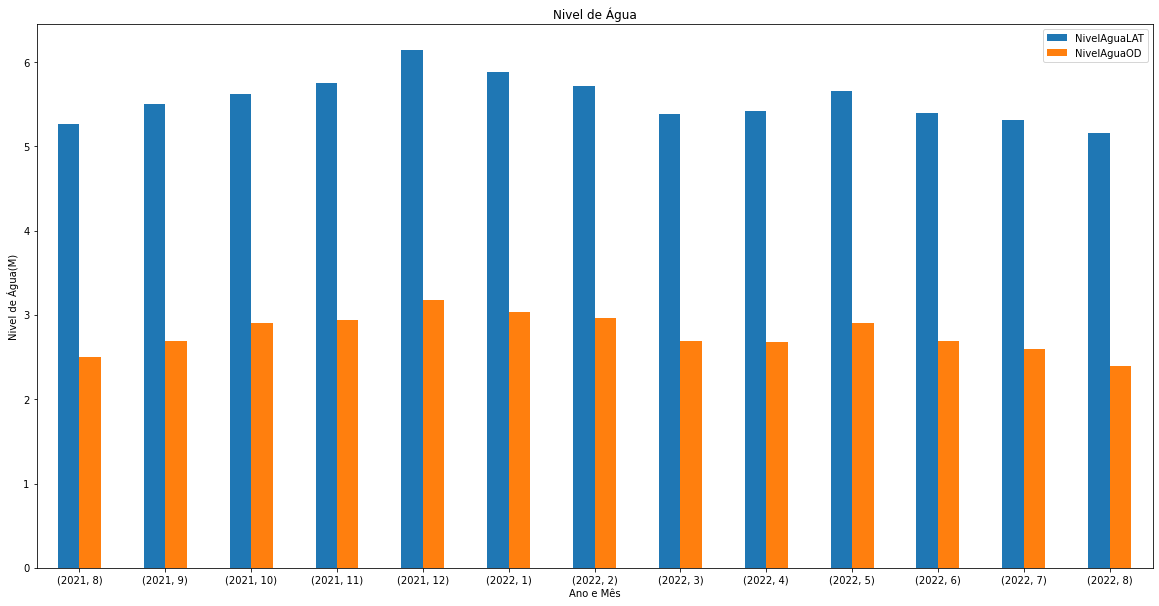

In [224]:
wrap_labels(ax, 10)
ax.figure

Após a realização da seleção de colunas e agrupamentos conclui que o maior nível de água no período de um ano aconteceu no mês 12 de 2021.

# Questão 3.

## Como os comprimentos de onda se correlacionam com a temperatura do mar

In [49]:
colunas_selecionadas3 = ['TamanhoOnda', 'TemperaturaMar']

In [50]:
microdados3= todos_dados_wave.filter(items=colunas_selecionadas3)

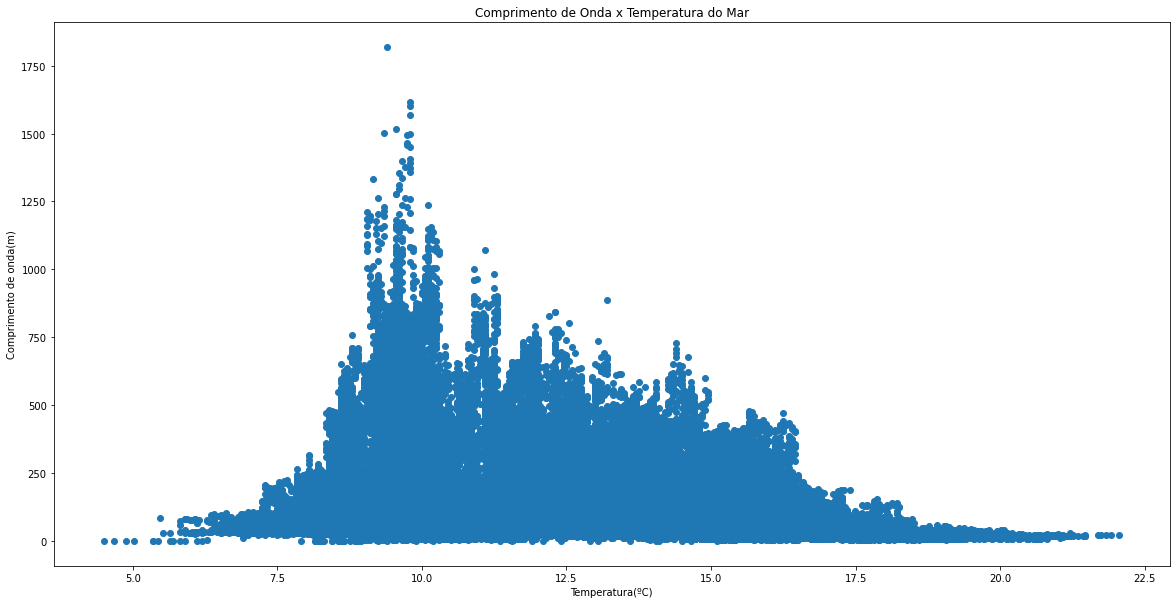

In [51]:
plt.figure(figsize=(20,10))
plt.scatter(microdados3['TemperaturaMar'], microdados3['TamanhoOnda'])
plt.title('Comprimento de Onda x Temperatura do Mar')
plt.xlabel('Temperatura(ºC)')
plt.ylabel('Comprimento de onda(m)')
plt.show()

Para entender a correlação e de fato constatar se há alguma, fiz o gráfico. Notei que quando a temperatura chega por volta de 8 °C o comprimento de onda também começa a crescer, e por volta dos 11 °C volta a abaixar.

Mas isso não significa muito, por isso vou utilizar a função corr que faz correlação de Pearson para descobrir Comprimento de Onda e Temperatura do Mar se relacionam nesse âmbito.

In [52]:
microdados3.corr()

,TamanhoOnda,TemperaturaMar
TamanhoOnda,1.000000,-0.269728
TemperaturaMar,-0.269728,1.000000


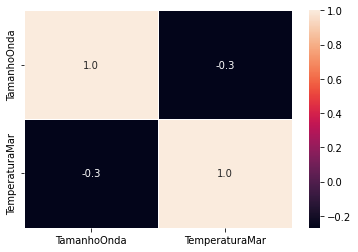

In [57]:
plot = sns.heatmap(microdados3.corr(), annot = True, fmt=".1f", linewidths=.6)
plt.show()

Com mais precisão posso confirmar não haver correlação, pois o crescimento da temperatura não afeta o crescimento de comprimento de ondas por conta O coeficiente de Pearson ter ficado entre 0.3 até 0.

## É possível prever com precisão o Comprimento de Onda, com base na Temperatura do Mar e Localização das Boias?

Farei um modelo de serie temporal para prever o comprimento da onda com o ARIMA que só precisa próprios valores de comprimento de ondas passadas.

In [185]:
todos_dados_wave = pd.concat((pd.read_csv(cont)for cont in dados_wave), ignore_index=True)

In [186]:
todos_dados_wave['time'] = pd.to_datetime(todos_dados_wave['time'], errors='coerce')

In [187]:
todos_dados_wave['time'].dt.tz_localize(None)

0                        NaT
1        2021-08-11 02:22:00
2        2021-08-11 02:52:00
3        2021-08-11 03:22:00
4        2021-08-11 03:52:00
                 ...        
270332   2022-08-12 01:20:00
270333   2022-08-12 01:25:00
270334   2022-08-12 01:30:00
270335   2022-08-12 01:35:00
270336   2022-08-12 01:40:00
Name: time, Length: 270337, dtype: datetime64[ns]

In [188]:
todos_dados_wave['data'] = pd.to_datetime(todos_dados_wave['time']).dt.date

In [189]:
todos_dados_wave = todos_dados_wave.set_index('data')

In [190]:
todos_dados_wave['SignificantWaveHeight'] = pd.to_numeric(todos_dados_wave['SignificantWaveHeight'], errors='coerce')

Importei novamente a base de dados para poder transformar a data de modo que se ajustasse no modelo de predição 

In [191]:
colunas_selecionadas3a = ['data', 'SignificantWaveHeight']

In [192]:
microdados3a = todos_dados_wave.filter(items=colunas_selecionadas3a)

In [193]:
microdados3a = microdados3a.dropna()
print('Shape of data',microdados3a.shape)
microdados3a

Shape of data (81185, 1)


,SignificantWaveHeight
data,
2021-08-11,142.0
2021-08-11,141.0
2021-08-11,136.0
2021-08-11,128.0
2021-08-11,127.0
...,...
2022-08-11,36.0
2022-08-11,38.0
2022-08-12,34.0


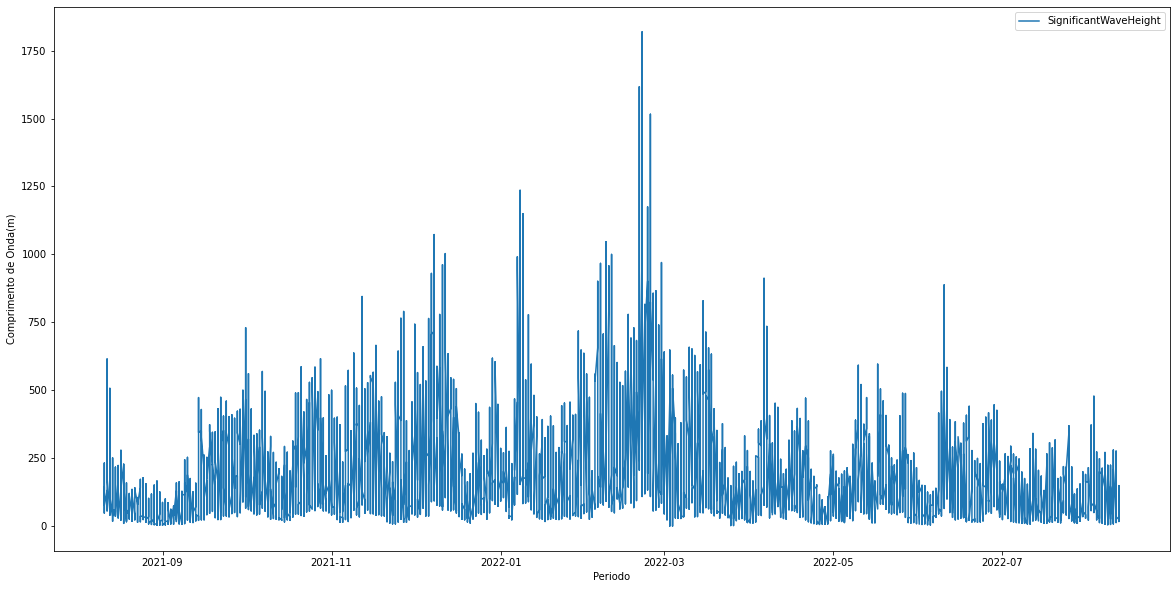

In [195]:
microdados3a.plot(figsize=(20,10))
plt.xlabel('Periodo')
plt.ylabel('Comprimento de Onda(m)')
plt.show()

O próximo que fiz foi plotar os dados para saber se eram estacionários.

Não há uma média constante perceptível. E as flutuações também não são claras. Então, para ter certeza se os dados são estacionários ou não, executei um teste estatístico fixo.

In [196]:
from statsmodels.tsa.stattools import adfuller
def ad_test1(microdados3a):
     dftest = adfuller(microdados3a, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)


In [464]:
ad_test1(microdados3a['SignificantWaveHeight'])

1. ADF :  -9.443851738456845
2. P-Value :  4.814119312084082e-16
3. Num Of Lags :  65
4. Num Of Observations Used For ADF Regression: 81119
5. Critical Values :
	 1% :  -3.4304306162174414
	 5% :  -2.8615756310137086
	 10% :  -2.5667889651577083


Os dados são maiores que 0,05; significando que não são estacionários.

In [421]:
from pmdarima import auto_arima 
stepwise_fit = auto_arima(microdados3a['SignificantWaveHeight'], trace=True, 
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=684338.356, Time=23.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=698995.310, Time=0.97 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=687292.128, Time=1.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=686780.857, Time=5.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=698993.310, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=684353.237, Time=17.64 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=685989.517, Time=9.92 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=684332.215, Time=51.73 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=684808.886, Time=39.44 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=684332.109, Time=77.77 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=684430.612, Time=43.69 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=684332.454, Time=100.79 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=91.13 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=684335.644, Time=43.24 sec
 A

Utilizei a biblioteca pmdarima para fazer o trabalho de descobrir a ordem do ARIMA sozinho

forneci os dados para a função auto_arima. Assim essa função usa algo chamado de pontuação AIC para julgar o qual será o melhor modelo a ser usado

Podemos ver que o melhor modelo ARIMA parece ser da ordem (5,2,1) com a pontuação mínima do AIC=684327,729. Com esse conhecimento, posso finalmente proceder ao treinamento e ajuste do modelo para começar a fazer previsões.

In [197]:
print(microdados3a.shape) 
train=microdados3a.iloc[:-360] 
test=microdados3a.iloc[-360:] 
print(train.shape,test.shape)

(81185, 1)
(80825, 1) (360, 1)


In [198]:
import statsmodels.api as sm

In [199]:
model=sm.tsa.statespace.SARIMAX(train['SignificantWaveHeight'],order=(5,1,2)) 
result = model.fit()
print(result.summary())

                                 SARIMAX Results                                 
Dep. Variable:     SignificantWaveHeight   No. Observations:                80825
Model:                  SARIMAX(5, 1, 2)   Log Likelihood             -340812.227
Date:                   Tue, 16 Aug 2022   AIC                         681640.454
Time:                           01:16:54   BIC                         681714.854
Sample:                                0   HQIC                        681663.250
                                 - 80825                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9533      0.023     41.135      0.000       0.908       0.999
ar.L2         -0.0645      0.008     -7.765      0.000      -0.081      -0.048
ar.L3         -0.0055      0

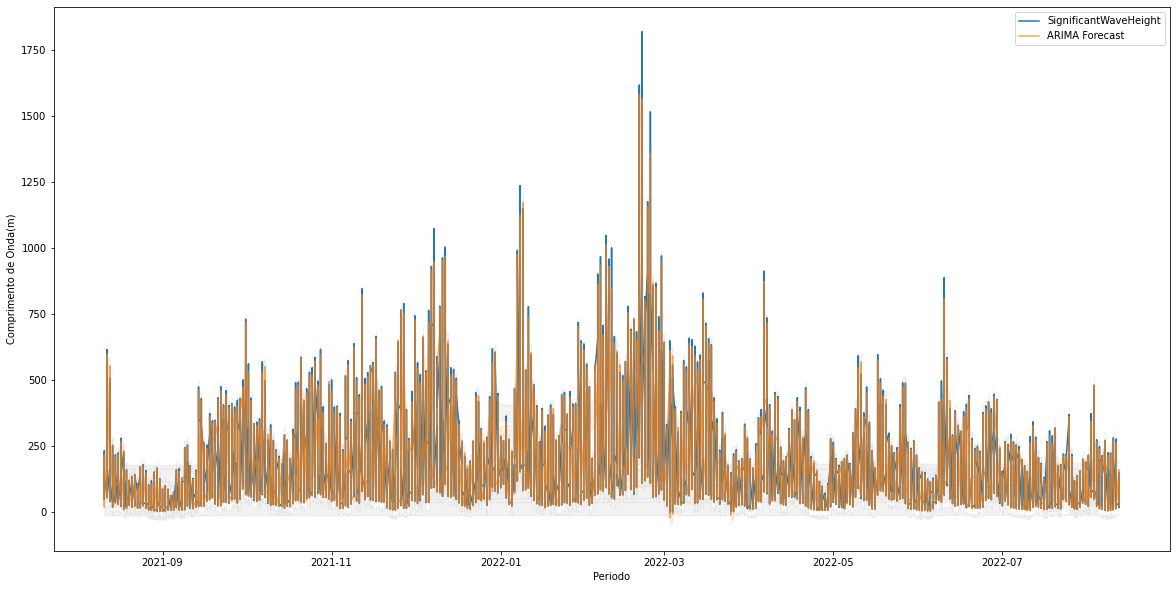

In [200]:
start=1
pred=result.get_prediction(start=start, dynamic=False)
pred_ci = pred.conf_int()
ax = microdados3a.plot(label='Original data')
pred.predicted_mean.plot(ax=ax, label='ARIMA Forecast', alpha=.7, figsize=(20, 10)) 
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.05)
plt.xlabel('Periodo')
plt.ylabel('Comprimento de Onda(m)')
plt.legend()
plt.show()


Após as informações sobre o modelo onde há coeficientes de cada termo Auto-Regressão e Média Móvel. Tracei um gráfico para ver se as previsões se comparam aos dados reais.

# Bonus

## Modelo de série temporal que possa prever a temperatura do mar ao longo do ano

In [206]:
colunas_selecionadasBonus = ['data', 'SeaTemperature']

In [207]:
microdadosBonus = todos_dados_wave.filter(items=colunas_selecionadasBonus)

In [208]:
todos_dados_wave['SeaTemperature'] = pd.to_numeric(todos_dados_wave['SeaTemperature'], errors='coerce')

In [209]:
microdadosBonus = microdadosBonus.dropna()
print('Shape of data',microdadosBonus.shape)
microdadosBonus

Shape of data (270331, 1)


,SeaTemperature
data,
2021-08-11,15.25
2021-08-11,15.25
2021-08-11,15.30
2021-08-11,15.30
2021-08-11,15.30
...,...
2022-08-12,18.21
2022-08-12,18.21
2022-08-12,18.25


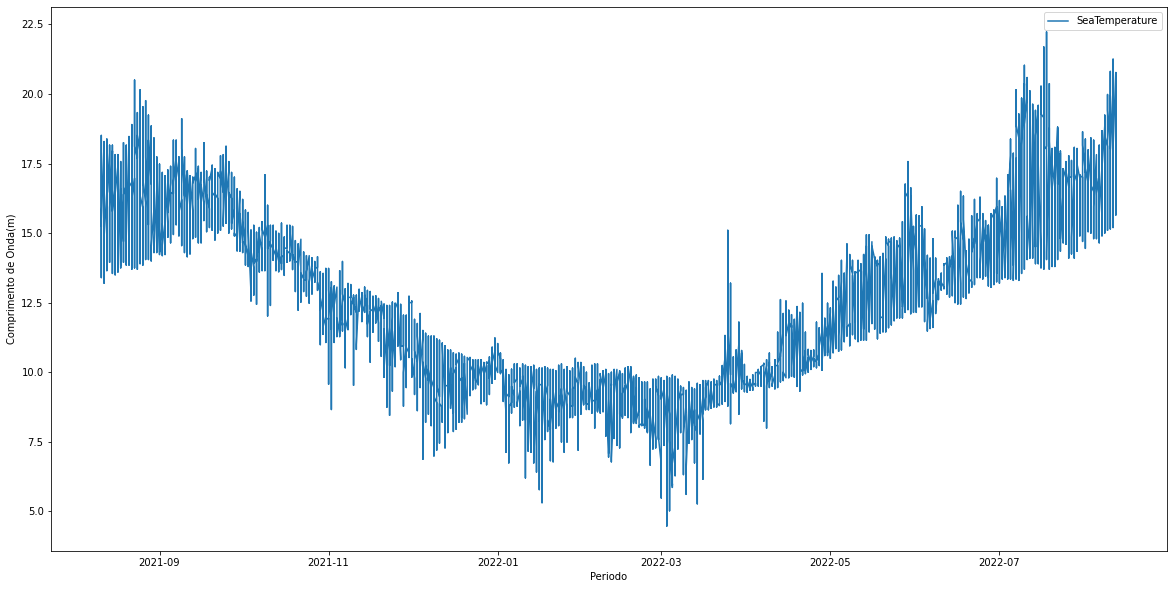

In [210]:
microdadosBonus.plot(figsize=(20,10))
plt.xlabel('Periodo')
plt.ylabel('Comprimento de Onda(m)')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test2(microdadosBonus):
     dftest = adfuller(microdadosBonus, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)


In [512]:
ad_test2(microdadosBonus['SeaTemperature'])

1. ADF :  -3.9771727106455423
2. P-Value :  0.001534873269101063
3. Num Of Lags :  87
4. Num Of Observations Used For ADF Regression: 270243
5. Critical Values :
	 1% :  -3.430374198081414
	 5% :  -2.861550695247122
	 10% :  -2.5667756926928518


In [517]:
from pmdarima import auto_arima 
stepwise_fit = auto_arima(microdadosBonus['SeaTemperature'], trace=True, 
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-829365.739, Time=30.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-827376.682, Time=23.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-829269.648, Time=28.42 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-829187.044, Time=16.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-827378.670, Time=13.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-829369.026, Time=26.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-829360.667, Time=28.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-829369.571, Time=20.90 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-829368.980, Time=24.53 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-829369.472, Time=44.70 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-829371.562, Time=17.90 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-829189.034, Time=7.26 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-829271.638, Time=11.32 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-82937

In [211]:
print(microdadosBonus.shape) 
train=microdadosBonus.iloc[:-360] 
test=microdadosBonus.iloc[-360:] 
print(train.shape,test.shape)

(270331, 1)
(269971, 1) (360, 1)


In [212]:
modelBonus =sm.tsa.statespace.SARIMAX(train['SeaTemperature'],order=(1,1,1)) 
resultBonus = modelBonus.fit()
print(resultBonus.summary())

                               SARIMAX Results                                
Dep. Variable:         SeaTemperature   No. Observations:               269971
Model:               SARIMAX(1, 1, 1)   Log Likelihood              414032.183
Date:                Tue, 16 Aug 2022   AIC                        -828058.365
Time:                        01:17:54   BIC                        -828026.847
Sample:                             0   HQIC                       -828049.208
                             - 269971                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3079      0.003    103.763      0.000       0.302       0.314
ma.L1         -0.2260      0.003    -74.836      0.000      -0.232      -0.220
sigma2         0.0027   1.43e-07    1.9e+04      0.0

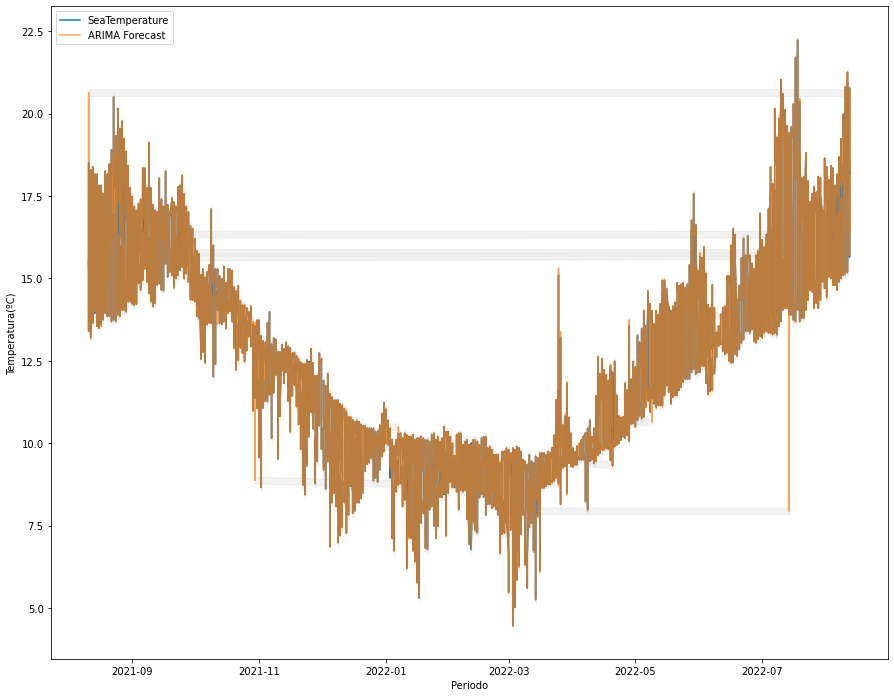

In [157]:
start=1
predBonus=resultBonus.get_prediction(start=start, dynamic=False)
pred_ciBonus = predBonus.conf_int()
ax = microdadosBonus.plot(label='Original data')
predBonus.predicted_mean.plot(ax=ax, label='ARIMA Forecast', alpha=.7, figsize=(15, 12)) 
ax.fill_between(pred_ciBonus.index,
                pred_ciBonus.iloc[:, 0],
                pred_ciBonus.iloc[:, 1], color='k', alpha=.05)
plt.xlabel('Periodo')
plt.ylabel('Temperatura(ºC)')
plt.legend()
plt.show()

Assim como o primeiro modelo de série temporal, redirecionei esse a prever a temperatura do mar no período de um ano.

Comparando os gráficos nota-se que a revisões fazem um bom trabalho ao combinar com a tendência real.